# [Visualization Notes](https://visualization-notes.blogspot.com/)
## Code Modules & Data Files

In [1]:
import os,cv2,urllib
import numpy as np,pylab as pl
from skimage import color,measure
from skimage.transform import resize
import matplotlib.patches as pt
from IPython.core.magic import register_line_magic
from IPython.display import HTML
pi=np.pi
print(os.listdir("../input/image-examples-for-mixed-styles"))

['pattern08.png', 'picture01.png', 'pattern05.png', 'picture08.png', 'picture07.png', 'flower.png', 'cat.png', 'picture04.png', 'picture02.png', 'pattern04.png', 'pattern06.png', 'pattern07.png', 'picture05.png', 'picture06.png', 'picture03.png', 'pattern03.png', 'sport.png', 'pattern01.png', 'pattern02.png']


## Contour Detection

In [2]:
@register_line_magic
def vector(file):
    cm=['ocean','cool','gnuplot2','terrain',
        'winter','spring','summer','autumn']
    rn=np.random.randint(0,8)
    path1='../input/image-examples-for-mixed-styles/'
    path2='pattern0%s'%(file)+'.png'
    img=cv2.imread(path1+path2)
    gray_img=color.colorconv.rgb2grey(img) 
    contours=measure.find_contours(gray_img,.7)
    n=len(contours); pl.figure(figsize=(10,10))
    pl.gca().invert_yaxis()
    [pl.plot(contours[i][:,1],contours[i][:,0],lw=.5,
             color=pl.get_cmap(cm[rn])(i/n)) 
     for i in range(n)]
    pl.xticks([]); pl.yticks([]); pl.show()

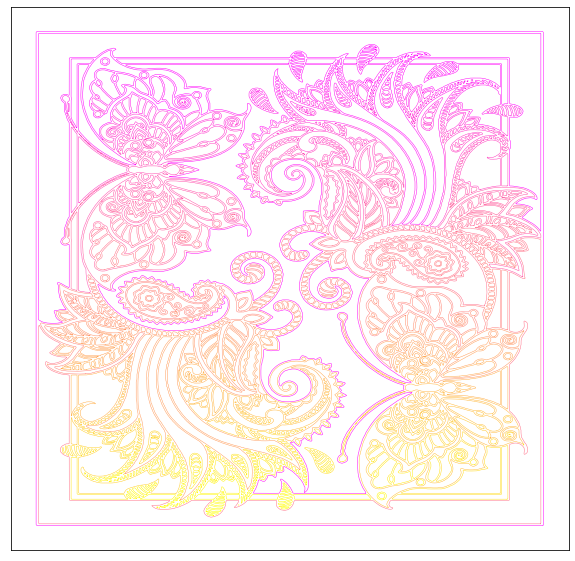

In [3]:
%vector 7

## Key Points of Sketch Images

In [4]:
kp=[[[139,141,128,109,84,50,37,21,14,6,1,1,14,39,59,80, 
      124,160,174,186,190,194,191,177,141,119,108,106], 
     [115,44,29,17,11,10,14,24,33,50,74,132,169,203,215,
      219,218,205,192,171,155,116,99,81,49,40,40,45]], 
     [[82,74,62,37,22,7,7,22,39,86,118,124,142,147,146,130,116,101,85,56,50,49], 
      [31,30,36,51,65,97,130,162,177,196,199,195,174,138,113,69,50,39,33,33,42,51]], 
     [[73,67,63,62,66,82,86,82,71,63],[93,94,103,114,120,119,109,96,90,91]], 
     [[109,89,79],[64,84,105]],[[89,111],[108,157]],
     [[63,47,44,45,57,71,83,83,79,70,52,46,48],[4,6,11,24,36,37,27,20,14,6,0,2,10]], 
     [[80,63,48],[203,218,247]],[[127,160],[197,255]]]

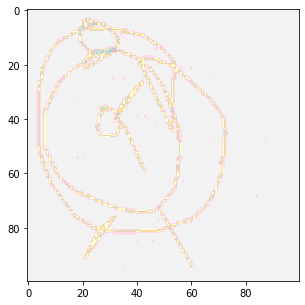

In [5]:
def get_line(x1,y1,x2,y2):
    steep=abs(y2-y1)>abs(x2-x1); rev=False
    if steep: [x1,y1,x2,y2]=[y1,x1,y2,x2]
    if x1>x2:
        [x1,x2,y1,y2]=[x2,x1,y2,y1]; rev=True
    dx=x2-x1; dy=abs(y2-y1); error=int(dx/2)
    xy=[]; y=y1; ystep=None
    if y1<y2: ystep=1
    else: ystep=-1
    for x in range(x1,x2+1):
        if steep: xy.append([y,x])
        else: xy.append([x,y])
        error-=dy
        if error<0: y+=ystep; error+=dx
    if rev: xy.reverse()
    return xy
def get_image(data,I):
    img=np.zeros((280,280))
    for [x,y] in data:
        for i in range(len(x)):
            img[y[i]+20][x[i]+50]=1
            if (i<len(x)-1): x1,y1,x2,y2=x[i],y[i],x[i+1],y[i+1]
            else: x1,y1,x2,y2=x[i],y[i],x[0],y[0]
            for [xl,yl] in get_line(x1,y1,x2,y2): img[yl+10][xl+10]=1                
    return resize(img,(I,I))
img=get_image(kp,100); pl.figure(figsize=(5,5))
pl.imshow(img,cmap=pl.cm.Pastel1_r); pl.show()

## Random Coefficients & Colors

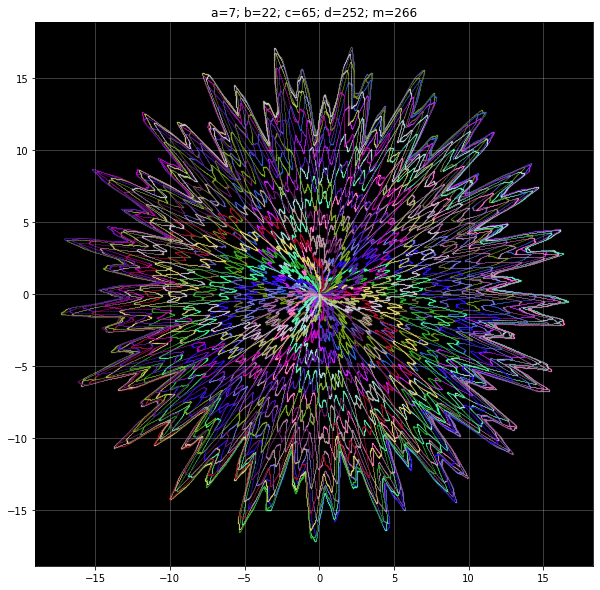

In [6]:
n=24; t=np.arange(0,2*pi,.1**3*2*pi/n)
def randi(nmin,nmax): return np.random.randint(nmin,nmax)
a,b,c,d,m=randi(5,11),randi(12,24),randi(25,81),randi(216,256),randi(100,300)
pl.figure(figsize=(10,10)); ax=pl.gca(); ax.set_facecolor('black')
for i in range(n):
    f1=(a+.9*np.cos(b*t+2*pi*i/n))*(1+.1*np.cos(c*t+2*pi*i/n))
    f2=(1+.01*np.cos(d*t+2*pi*i/n))*(1+np.sin(t+2*pi*i/n))
    x=f1*f2*np.cos(t); y=f1*f2*np.sin(t)
    pl.scatter(x,y,s=.1**2,c=np.random.random(3))
pl.title('a=%d; b=%d; c=%d; d=%d; m=%d'%(a,b,c,d,m))
pl.grid(c='white',alpha=.3); pl.show()

## Recurrence Tables

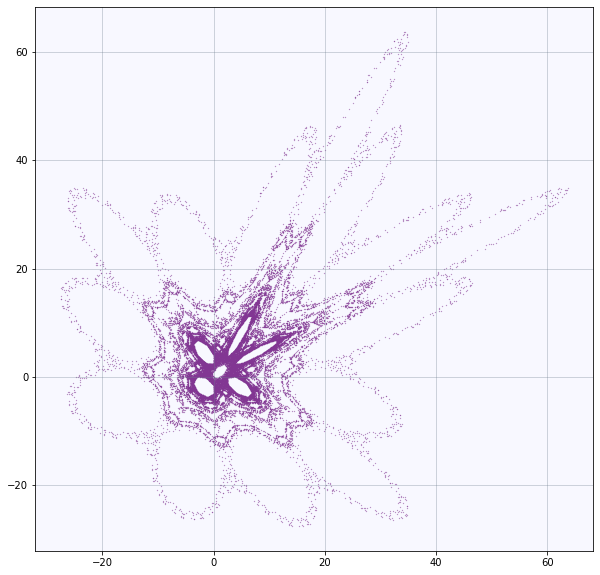

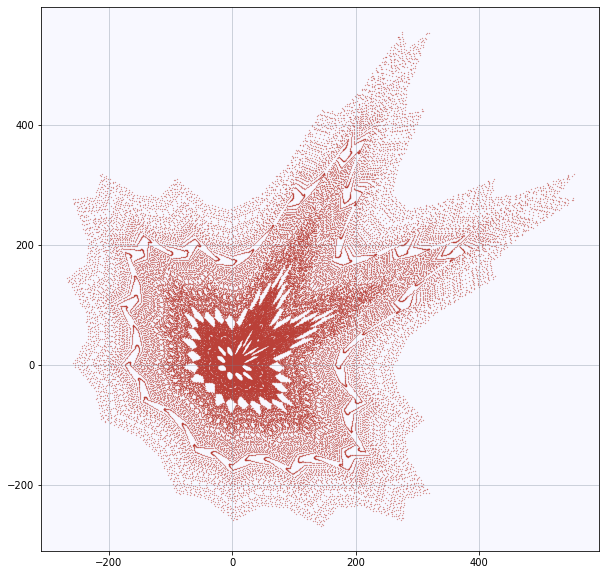

In [7]:
import numpy as np,pylab as pl
def gen(a,b,n):
    i=1; xyi=[0.,0.]
    while i<=n:
        yield xyi; i+=1; xi,yi=xyi[0],xyi[1]
        xyi=[(1+.01*a)*abs(xi)-(1+.00001*b)*yi+1,xi]
for n in [30000,100000]: 
    a,b=7,5; xy=gen(a,b,n); xyn=np.array([el for el in xy])      
    pl.figure(figsize=(10,10)); ax=pl.gca()
    ax.set_facecolor('ghostwhite')
    pl.scatter(xyn[:,0],xyn[:,1],s=.05,c=[np.random.random(3)])
    pl.grid(c='slategray',alpha=.4); pl.show()

## Random Patterns

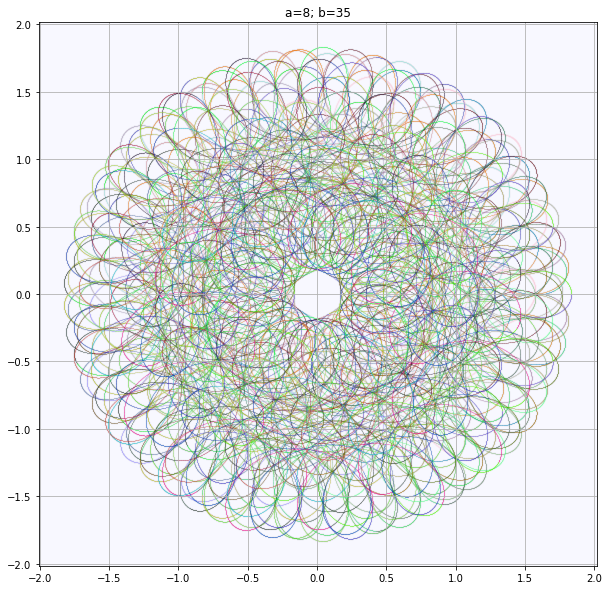

In [8]:
def t(i): return np.arange((i-1)*pi/24,i*pi/24,1/10**4)
def x(a,b,i,k): return np.cos(t(i)+k*pi/6)+np.cos(a*t(i))/2+np.sin((a+b)*t(i))/3
def y(a,b,i,k): return np.sin(t(i)+k*pi/6)+np.sin(a*t(i))/2+np.cos((a+b)*t(i))/3
A,B=randi(5,15),randi(10,36) 
pl.figure(figsize=(10,10)); ax=pl.gca(); ax.set_facecolor('ghostwhite')
for i in range(48):
    col=[np.random.random(3)]
    for k in range(12): 
        pl.scatter(x(A,B,i,k),y(A,B,i,k),s=.1**3,c=col)
pl.title('a=%d; b=%d'%(A,B)); pl.grid(); pl.show()

## Coordinate Rotation

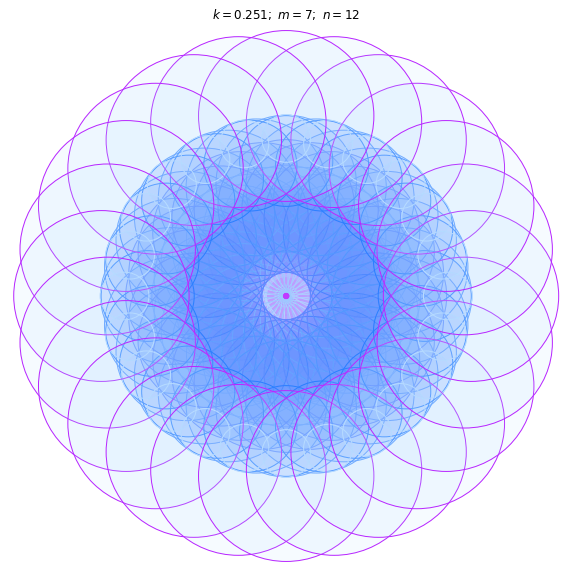

In [9]:
def rotate_xy(k,x,y):
    return np.array([[np.cos(i*pi/k)*x-np.sin(i*pi/k)*y,
             np.sin(i*pi/k)*x+np.cos(i*pi/k)*y] for i in range(2*k)])
def circle_mandala(k,n,m):
    c=np.array([rotate_xy(n,.5+k*i,.5+k*i) for i in range(m)])
    r=[np.random.randint(300,1800)/1000 for i in range(m)]
    l=.1+r[m-1]+c.max()
    col=[[np.random.randint(100,900)/1000 
          for j in range(2)]+[1] for i in range(m)]
    fig,ax=pl.subplots(figsize=(10,10))
    for i in range(m):
        for j in range(2*n):
            ax.add_patch(pt.Circle(c[i][j],r[i],alpha=0.1,color=col[i]))
            ax.add_patch(pt.Circle(c[i][j],r[i],fill=False,edgecolor=col[m-i-1]))
    pl.title('$k=%.3f; \ m=%d; \ n=%d$'%(k,m,n))
    pl.axis('off'); pl.xlim(-l,l); pl.ylim(-l,l); pl.show()
k=np.random.randint(100,900)/1000 
n=np.random.randint(5,15); m=np.random.randint(3,9)
circle_mandala(k,n,m)

## "Universal" Functions for Sketch Images

In [10]:
X=[[[67/5,pi/2,0],[-14/5,11/7,-10],[2942/7,16/5,1],[43/5,39/10,2],[123/4,3/7,3],[10,3/5,4],
    [39/4,15/4,5],[44/7,49/12,6],[7/2,1,7],[29/7,8/7,8],[5/4,23/6,9]]+6*[[0,0,0]],
   [[-4019/4,pi/2,0],[-22/5,4/3,-8],[1841/6,19/7,1],[357/4,23/11,2],[106/3,4,3],[351/14,1/14,4],
    [127/8,22/7,5],[36/5,33/7,6],[91/18,22/9,7],[23/6,1/5,9],[17/6,9/2,10]]+6*[[0,0,0]],
   [[1198/3,pi/2,0],[-61/15,8/9,-8],[-51/5,4/3,-6],[1453/4,14/5,1],[614/7,13/6,2],[75/2,13/3,3],
    [122/5,1/16,4],[175/11,13/4,5],[19/4,9/5,7],[5,1/2,9],[13/7,4,10]]+6*[[0,0,0]],
   [[-13027/13,pi/2,0],[-14/3,2/5,-6],[-29/5,5/9,-5],[-37/4,1/3,-4],[3021/7,97/32,1],[179/9,34/11,2],
    [53/5,29/10,3],[1/2,18/5,7],[11/6,16/7,8],[11/5,7/3,9],[5/6,11/5,10]]+6*[[0,0,0]],
   [[785/2,pi/2,0],[-3/5,1/6,-10],[-23/7,2/7,-6],[-23/3,1/8,-5],[-10,1/5,-4],[2417/5,34/11,1],
    [89/4,16/5,2],[11/5,14/5,3],[31/16,17/6,7],[20/7,23/8,8],[17/7,11/4,9]]+6*[[0,0,0]],
   [[-1087/5,pi/2,0],[-2,4/3,-16],[-39/11,6/5,-14],[-21/4,14/9,-12],[-41/3,3/2,-6],
    [5028/5,23/12,1],[713/14,17/5,2],[103/3,7/3,3],[258/7,13/3,4],[142/13,1,5],[179/15,9/7,7],
    [17/3,13/3,8],[47/6,5/3,9],[90/13,22/5,10],[18/5,13/7,11],[18/5,7/5,13],[26/7,7/4,15]],
   [[-277/3,pi/2,0],[8875/6,28/9,1]]+15*[[0,0,0]],[[-467/5,pi/2,0],[4832/3,31/10,1]]+15*[[0,0,0]]]
Y=[[[-6393/7,pi/2,0],[-1/3,4/3,-10],[-21/22,3/5,-9],[-4,7/5,-5],[-21/4,1/4,-4],[4217/17,9/2,1],
    [74/3,15/7,2],[32/3,11/7,3],[7/4,16/5,6],[2,13/6,7],[4/5,2/3,8]]+6*[[0,0,0]],
   [[4843/9,pi/2,0],[-209/6,1/5,-4],[-249/8,6/5,-3],[577/2,40/9,1],[184/3,9/4,2],[83/7,2/3,5],
    [25/3,12/5,6],[5,17/6,7],[5/3,1/7,8],[23/6,1/4,9],[5/4,5/4,10]]+6*[[0,0,0]],
   [[5301/10,pi/2,0],[-131/4,4/5,-3],[1781/6,9/2,1],[422/7,9/4,2],[189/5,1/16,4],[79/6,8/5,5],
    [34/3,26/9,6],[22/5,23/7,7],[35/12,2/7,8],[11/4,5/7,9],[14/5,10/3,10]]+6*[[0,0,0]],
   [[2127/4,pi/2,0],[401,23/5,1],[118/3,7/5,2],[68/3,6/5,3],[133/8,6/5,4],[11/3,4/3,5],
    [24/7,57/14,6],[34/7,45/11,7],[25/7,37/9,8],[1/3,19/5,9],[9/5,3/5,10]]+6*[[0,0,0]],
   [[3688/7,pi/2,0],[13121/32,14/3,1],[44,10/7,2],[123/4,7/5,3],[15,4/3,4],[3/4,12/5,5],
    [27/5,13/3,6],[40/7,31/7,7],[13/6,13/3,8],[6/5,6/5,9],[58/19,1,10]]+6*[[0,0,0]],
   [[-9879/19,pi/2,0],[-19/7,8/7,-12],[-103/5,7/8,-5],[-80/9,11/7,-4],[3665/6,18/5,1],
    [803/6,13/5,2],[441/8,9/2,3],[17/2,4/5,6],[27/5,1/3,7],[17/3,2,8],[9/5,24/7,9],
    [15/4,26/7,10],[13/5,41/9,11],[16/17,1/5,13],[23/11,1/4,14],[7/4,25/12,15],[2/3,9/7,16]],
   [[1105/12,pi/2,0],[5913/4,14/3,1]]+15*[[0,0,0]],[[359/4,pi/2,0],[8012/5,14/3,1]]+15*[[0,0,0]]]

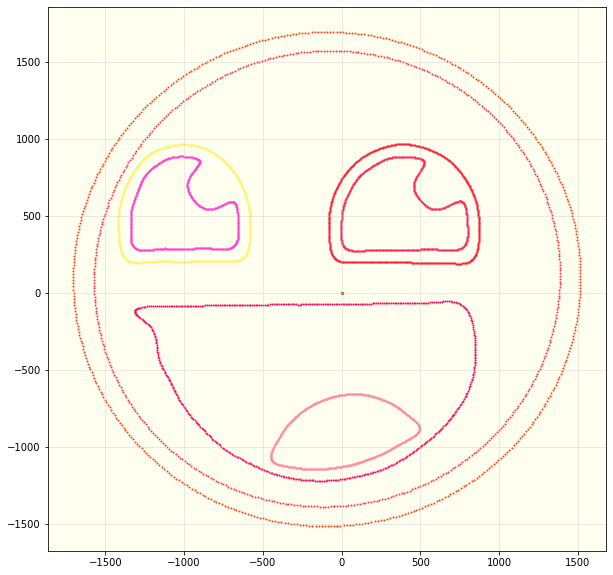

In [11]:
def unit_step(t):
    if t<0: return 0
    else: return 1
def bf(k,t): return k[0]*np.sin(k[1]+k[2]*t)
def us(j,t): return unit_step((31-4*j)*pi-t)*unit_step((-27+4*j)*pi+t)
def gus(t): return unit_step(np.sign(np.sin(t/2)))
def x(t): 
    return np.sum([np.sum([bf(X[j][i],t) for i in range(17)])*us(j,t) 
                   for j in range(8)])*gus(t)
def y(t): 
    return np.sum([np.sum([bf(Y[j][i],t) for i in range(17)])*us(j,t) 
                   for j in range(8)])*gus(t)
T=[np.linspace(.1**5,2*pi-.1**5,512)+2*pi*i for i in range(16)]
XT=[[x(T[i][j]) for j in range(512)] for i in range(16)]
YT=[[y(T[i][j]) for j in range(512)] for i in range(16)]
fig,ax=pl.subplots(figsize=(10,10)); ax.set_facecolor('ivory')
col=[[np.append([1],np.random.random(2))] for i in range(16)]
[pl.scatter(XT[i],YT[i],s=1,c=col[i]) for i in range(16)]
pl.grid(c='silver',alpha=.4); pl.show()

## Bokeh

In [12]:
import numpy as np; from bokeh.layouts import gridplot
from bokeh.plotting import figure,show,output_file
from IPython.core import display
t=np.linspace(0,2*np.pi,720); 
x=(np.cos(12*t)+np.cos(6*t))*np.cos(t)
y=(np.cos(12*t)+np.cos(6*t))*np.sin(t)
TOOLS="pan,wheel_zoom,box_zoom,reset,save,box_select"
p1=figure(title='PLotting Example 1',tools=TOOLS)
p1.circle(x,y,legend_label=u'ϱ = cos 12 θ + cos 6 θ')
p1.circle(2*x,2*y,legend_label=u'2 ϱ',color="red")
p1.legend.title='Polar Functions'
p2=figure(title='Plotting Example 2',tools=TOOLS)
p2.circle(x,y,legend_label=u'ϱ = cos 12 θ + cos 6 θ')
p2.line(x,y,legend_label=u'ϱ = cos 12 θ + cos 6 θ')
p2.square(2*x,2*y,legend_label=u'2 ϱ',
          fill_color=None,line_color="red")
p2.line(2*x,2*y,legend_label=u'2 ϱ',line_color="red")
output_file("bokeh.html",title="plotting examples")
show(gridplot([p1,p2],ncols=2,plot_width=300,plot_height=300))
display.HTML('''<div id='data'><iframe src="bokeh.html" 
height="370" width="650"></iframe></div>''')

## Plotly.js

In [13]:
from IPython.display import HTML
html_str="""<script src='https://cdn.plot.ly/plotly-latest.min.js'>
</script>
<div id='test_plotly' style='width:600px;height:600px;'/>
<script>TEST=document.getElementById('test_plotly');
function f(t) {return Math.exp(Math.pow(Math.cos(0.001*t),2)+
                      Math.sin(0.001*t))-3*Math.cos(0.004*t);};
function arx(a) {return Array(6400).fill(1+0.1*a).map((r,t)=>
                        r*f(t)*Math.cos(0.001*t));};
function ary(a) {return Array(6400).fill(1+0.1*a).map((r,t)=>
                        r*f(t)*Math.sin(0.001*t));};
function col(a) {return 'rgb('+(1-0.05*a).toString()+',0,'+
                        (0.05*a).toString()+')';};
function plt(a) {return Plotly.plot(TEST,[{x:arx(a),y:ary(a),
                                           line:{color:col(a)},
                                           name:a.toString()}]);};
for (i=1; i<20; i++) {plt(i);}
</script>"""
html_file=open("plotly.html","w")
html_file.write(html_str)
html_file.close()
display.HTML('''<div id='data2'><iframe src="plotly.html" 
height="650" width="650"></iframe></div>''')

## Highcharts.js

In [14]:
from IPython.display import HTML
html_str='''<script src='https://code.highcharts.com/highcharts.js'></script>
<div id='highcharts' style='height:600px; width:550px; margin:0 auto'></div><script>
function getinteger(min,max) {return Math.floor(Math.random()*(max-min+1))+min;};
function fx(a,b,c,q,n,t,k) {
    var x1=Math.cos(Math.PI*t/n+k*Math.PI/q)+Math.cos(a*Math.PI*t/n+k*Math.PI/q);
    var x2=Math.cos(b*Math.PI*t/n+k*Math.PI/q)+Math.cos(c*Math.PI*t/n+k*Math.PI/q);
    return x1+x2};
function fy(a,b,c,q,n,t,k) {
    var y1=Math.sin(Math.PI*t/n+k*Math.PI/q)+Math.sin(a*Math.PI*t/n+k*Math.PI/q);
    var y2=Math.sin(b*Math.PI*t/n+k*Math.PI/q)+Math.sin(c*Math.PI*t/n+k*Math.PI/q);
    return y1+y2};
function ar(a,b,c,q,n,k) {return Array(2*n+1).fill(k).map((k,t)=>
                                 [fx(a,b,c,q,n,t,k),fy(a,b,c,q,n,t,k)]);};
function colrb(i) {var r=getinteger(i,255); var g=0; var b=getinteger(i,255);
    return 'rgb('+r.toString()+','+g.toString()+','+b.toString()+')';};   
var a=getinteger(5,9),b=getinteger(10,14),c=getinteger(15,19);
var q=getinteger(3,6),n=getinteger(4,24); var series=[];
for (var k=1; k<2*q+2; k++) {
    series.push({name:[k,a,b,c,n].toString(),marker:{symbol:"circle",radius:1},
                 color:colrb(k),lineWidth:0.5,data:ar(a,b,c,q,n,k)})};
Highcharts.chart('highcharts', {
    chart:{type:'line',backgroundColor:'ghostwhite'},
    xAxis:{title:{text:'x'}},yAxis:{title:{text:'y'}},
    title:{text:'Random Parametric Polygons'},credits:{enabled:false},
    legend:{enabled:false},series:series});
 </script>'''
html_file=open("highcharts.html","w")
html_file.write(html_str); html_file.close()
HTML('''<div id="data3"><iframe src="highcharts.html" 
height="650" width="650"></iframe></div>''')